# Assignment 7 : Clustering

# Business Problem


# Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters


# Using Normalize Function


In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # to handle the dataframe
xlsx = pd.ExcelFile(r"C:\Users\HP\Downloads\EastWestAirlines.xlsx")
df = pd.read_excel(xlsx,'data')
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [6]:
df1= pd.read_excel(xlsx, 'Description')
df1.head()

East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN

# EDA 

In [7]:
# check data type all null values exists or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [9]:
#no.of coloumns in dataset
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [10]:
# No Null values
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [11]:
#print(df["ID#"].unique())
#print(df["Balnace"].unique())
#print(df["Qual_miles"].unique())
#print(df["cc1_miles"].unique())
#print(df["cc2_miles"].unique())
#print(df["cc3_miles"].unique())
#print(df["Bonus_miles"].unique())
#print(df["Bonus_miles"].unique())
#print(df["Flight_miles_12mo"].unique())
#print(df["Flight_trans_12"].unique())
#print(df["Days_since_enroll"].unique())
df["Award?"].unique()

array([0, 1], dtype=int64)

In [12]:
# Rows and columns in dataset
df.shape

(3999, 12)

In [13]:
# to check if duplicate columns are there in dataset
df[df.duplicated()]

Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []

In [14]:
# Correlation between columns
df.corr()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID#                1.000000 -0.243737   -0.019374  -0.224465   0.020291   
Balance           -0.243737  1.000000    0.108722   0.338344  -0.008804   
Qual_miles        -0.019374  0.108722    1.000000   0.007931  -0.013923   
cc1_miles         -0.224465  0.338344    0.007931   1.000000  -0.068223   
cc2_miles          0.020291 -0.008804   -0.013923  -0.068223   1.000000   
cc3_miles         -0.014707  0.035243   -0.007779   0.060555  -0.006166   
Bonus_miles       -0.203012  0.403487    0.031021   0.825200  -0.003969   
Bonus_trans       -0.146915  0.324935    0.050725   0.608943   0.064399   
Flight_miles_12mo -0.031013  0.217551    0.126774   0.037370   0.010598   
Flight_trans_12   -0.052096  0.255700    0.144004   0.041333   0.028284   
Days_since_enroll -0.964988  0.263129    0.017312   0.230849  -0.005807   
Award?            -0.177901  0.178494    0.095256   0.335457   0.005332   

                   cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID#                -0.014707    -0.203012    -0.146915          -0.031013   
Balance             0.035243     0.403487     0.324935           0.217551   
Qual_miles         -0.007779     0.031021     0.050725           0.126774   
cc1_miles           0.060555     0.825200     0.608943           0.037370   
cc2_miles          -0.006166    -0.003969     0.064399           0.010598   
cc3_miles           1.000000     0.204134     0.097313          -0.001777   
Bonus_miles         0.204134     1.000000     0.603180           0.183536   
Bonus_trans         0.097313     0.603180     1.000000           0.377216   
Flight_miles_12mo  -0.001777     0.183536     0.377216           1.000000   
Flight_trans_12    -0.001117     0.185261     0.432364           0.869193   
Days_since_enroll   0.010832     0.210397     0.161262           0.037271   
Award?              0.023484     0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
ID#                      -0.052096          -0.964988 -0.177901  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

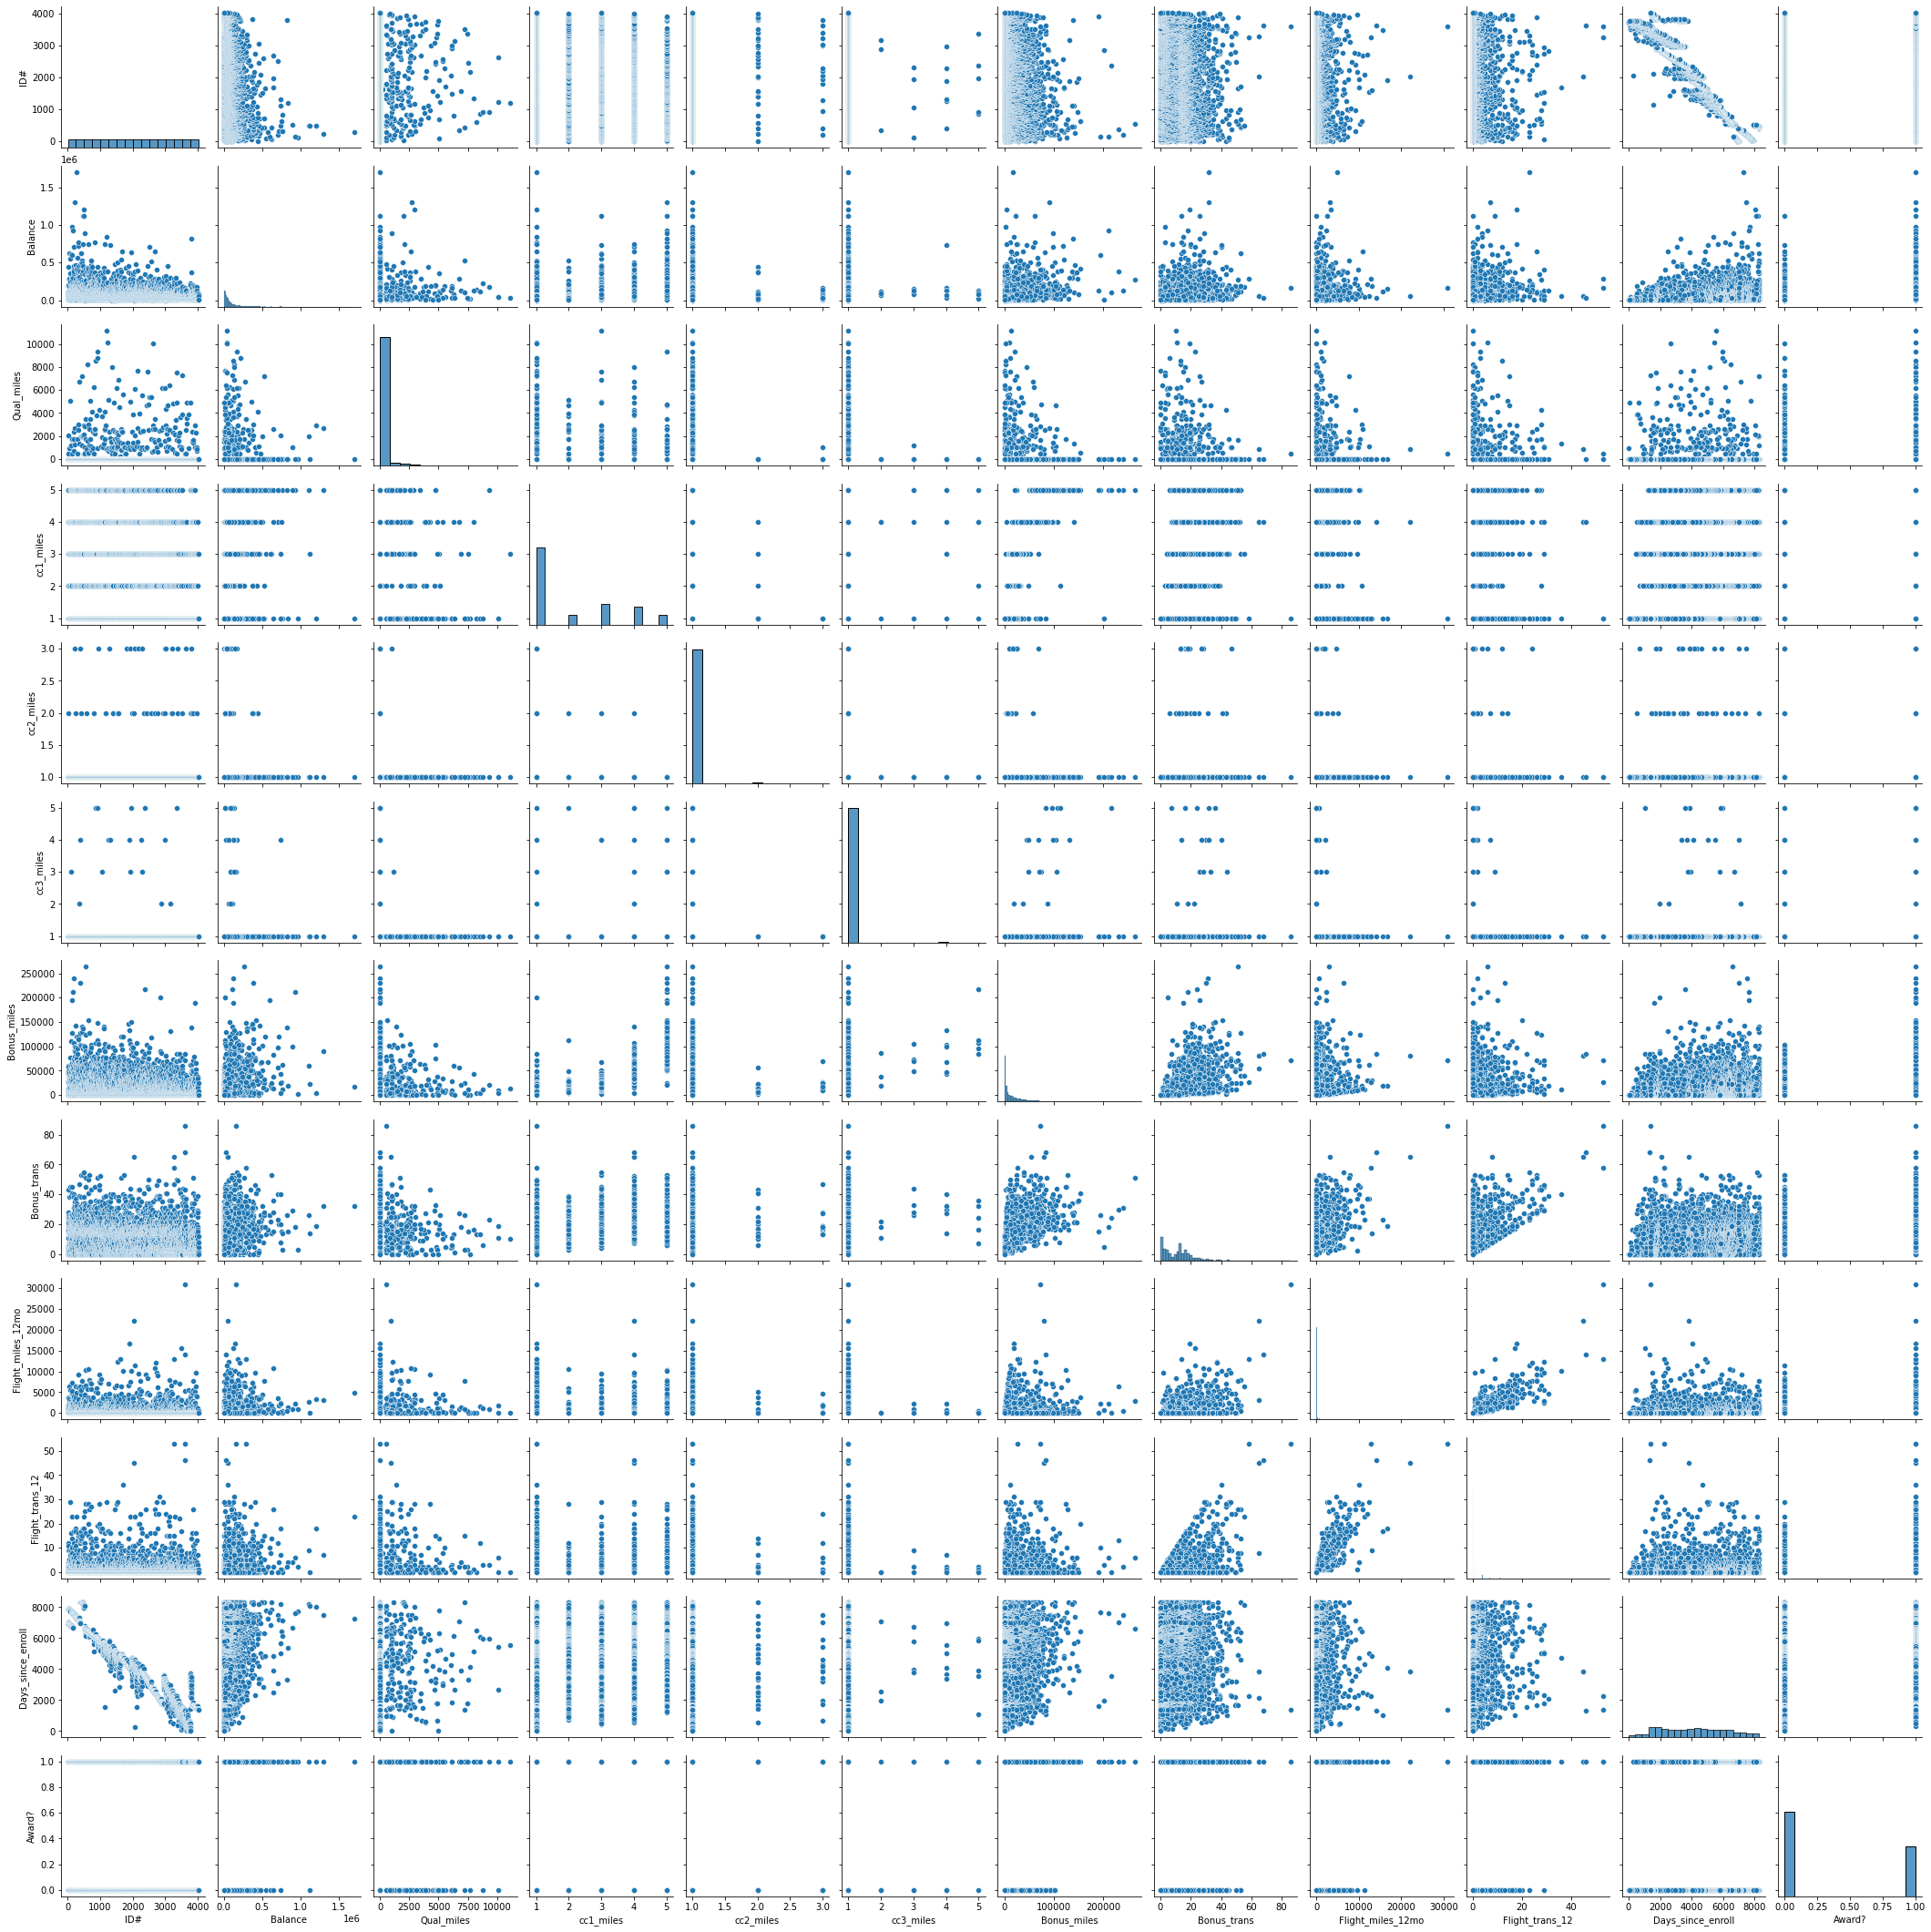

In [15]:
import seaborn as sns # for visualization
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

# Hierarchical Clustering

In [16]:
# importing clusters libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [17]:
# Normalization Function
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [18]:
# Normalize data frame (Considering the numerical part of data)
df_norm = norm_func(df.iloc[: , 1 :])
df_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

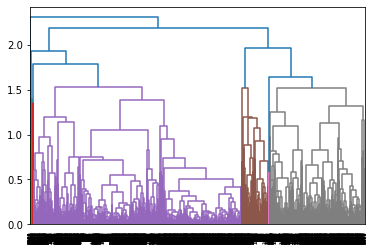

In [20]:
# Create Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [21]:
# Create Clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [22]:
# model fitting on datset
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [23]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [24]:
df['h_clusterid'] = y_hc
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  h_clusterid  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
4          1            1  
...      ...          ...  
3994       1            2  
3995       1            2  
3996       1            2  
3997       0            0  
3998       0            0  

[3999 rows x 13 columns]

In [25]:
df1 = df.sort_values("h_clusterid")
df.iloc[:,[0,-1]]

ID#  h_clusterid
0        1            0
1        2            0
2        3            0
3        4            0
4        5            1
...    ...          ...
3994  4017            2
3995  4018            2
3996  4019            2
3997  4020            0
3998  4021            0

[3999 rows x 2 columns]

In [26]:
# extracting features from datset
x =df.iloc[:,-1]
y =df1.iloc[:,-2]

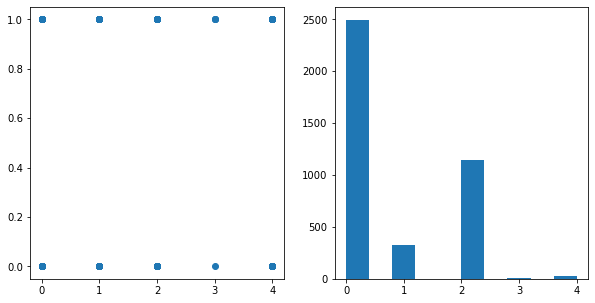

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax[0].scatter(x, y)
ax[1].hist(x)
plt.show()

# K_means Clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
# Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.30291870e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.30291870e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.30291870e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.39443508e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.30291870e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.30291870e-01]])

In [30]:
Kmeans = KMeans(n_clusters = 4, random_state = 0)
Kmeans.fit(scaled_df)
Kmeans.inertia_

29398.010583464187

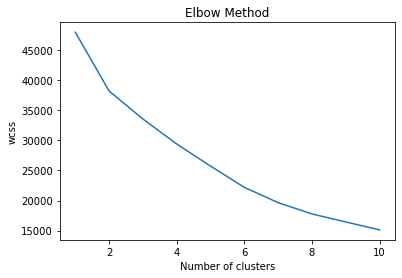

In [31]:
wcss = []
for i in range (1,11):
    Kmeans = KMeans(n_clusters = i, random_state = 0)
    Kmeans.fit(scaled_df)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [32]:
wcss

[47987.99999999998,
 38211.124669519784,
 33558.87513808704,
 29398.010583464187,
 25724.31104957196,
 22182.657410847598,
 19641.317239385524,
 17767.343981935242,
 16433.351051217418,
 15110.871518427077]

In [33]:
# Bulid cluster Algorithm
cluster_new = KMeans(4, random_state = 42)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [34]:
cluster_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
# Assign Cluster to the dataset
df['clusterid_new'] = cluster_new.labels_
cluster_new.cluster_centers_  # these are standarized value

array([[-0.28296685, -0.07459285, -0.51140363, -0.09824189, -0.060374  ,
        -0.49464343, -0.43536104, -0.21048576, -0.23150553, -0.22077758,
        -0.7669193 , -0.73029187],
       [-0.11898452,  0.01796365, -0.02570087,  0.24828443, -0.06276658,
        -0.09264573,  0.04829277, -0.04252018, -0.03640473,  0.061751  ,
         1.25394621,  1.45596192],
       [ 1.28268449,  0.979096  ,  0.16884431,  0.09952771, -0.06276658,
         0.72587331,  1.80724874,  3.84281759,  4.1336012 ,  0.2711156 ,
         0.98649052,  0.83611267],
       [ 0.80784264,  0.01015591,  1.60351768, -0.08835341,  0.29618383,
         1.54097507,  0.92625342, -0.04637238, -0.04807989,  0.54243493,
         0.30326531, -0.0866702 ]])

In [36]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new          ID#        Balance  Qual_miles cc1_miles cc2_miles  \
                        mean           mean        mean      mean      mean   
0             0  2256.573097   45088.720691   86.411957  1.355441  1.000000   
1             1  1960.337512   61592.021215  157.858245  2.026037  1.051109   
2             2  1743.043796  202848.547445  901.510949  2.291971  1.029197   
3             3  1395.135965  155168.978070  152.192982  4.267544  1.001462   

  cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
       mean          mean        mean              mean            mean   
0  1.000467   5200.222326    7.421298        165.368519        0.495563   
1  1.000000  14930.500482   12.080039        400.525554        1.236258   
2  1.000000  34673.197080   28.956204       5840.131387       17.051095   
3  1.070175  54379.250000   20.486842        395.125731        1.190058   

  Days_since_enroll    Award? h_clusterid  
               mean      mean        mean  
0       3662.680990  0.000000    0.000000  
1       4246.302797  0.975892    2.057859  
2       4678.379562  0.846715    1.474453  
3       5239.714912  0.516082    0.603801

In [37]:
df[df['clusterid_new'] ==3]
#df[df['clusterid_new'] == 0]

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
6        7    84914           0          3          1          1        27482   
11      12    96522           0          5          1          1        61105   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
...    ...      ...         ...        ...        ...        ...          ...   
3883  3906   126167           0          5          1          1       190160   
3886  3909    84979           0          4          1          1        36702   
3966  3989    91605           0          4          1          1        37840   
3974  3997    58387           0          3          1          1        14581   
3985  4008    59017           0          4          1          1        34746   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26               2077                4               6935   
6              25                  0                0               6994   
11             19                  0                0               6924   
15             15                  0                0               6912   
16             16                  0                0               6910   
...           ...                ...              ...                ...   
3883           15                  0                0               1612   
3886           16                  0                0               1600   
3966           18                  0                0               1444   
3974           39                  0                0               1435   
3985           25                  0                0               1418   

      Award?  h_clusterid  clusterid_new  
4          1            1              3  
6          0            0              3  
11         1            1              3  
15         1            1              3  
16         1            1              3  
...      ...          ...            ...  
3883       1            1              3  
3886       0            0              3  
3966       0            0              3  
3974       0            0              3  
3985       0            0              3  

[684 rows x 14 columns]

# DBSCAN : Density Base Spatial Clustering of Application with Noise

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
array = df.values

In [40]:
st_scaler = StandardScaler()
X = st_scaler.fit_transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00,  1.39443508e+00,  1.43487685e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01]])

In [41]:
dbscan = DBSCAN(eps = 5 , min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [42]:
#Noisy Samples are given the label: -1
print(dbscan.labels_)

[0 0 0 ... 0 0 0]


In [43]:
cl = pd.DataFrame(dbscan.labels_,columns = ['clusters'])

In [44]:
cl

clusters
0            0
1            0
2            0
3            0
4            0
...        ...
3994         0
3995         0
3996         0
3997         0
3998         0

[3999 rows x 1 columns]

In [45]:
clustered = pd.concat([df,cl],axis =1)
clustered

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  h_clusterid  clusterid_new  clusters  
0          0            0              0         0  
1          0            0              0         0  
2          0            0              0         0  
3          0            0              0         0  
4          1            1              3         0  
...      ...          ...            ...       ...  
3994       1            2              1         0  
3995       1            2              1         0  
3996       1            2              1         0  
3997       0            0              0         0  
3998       0            0              0         0  

[3999 rows x 15 columns]

In [46]:
# -1 shows outlier / extreme value for the dataset
clustered[clustered['clusters'] == -1].head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
106  109    96627        1182          1          1          3        49059   
220  224  1302051        2706          5          1          1        90653   
275  279  1704838           0          1          1          1        17108   
343  348   112501           0          1          1          2        19140   
384  389    28193           0          5          1          4       103456   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
106           26               2300                9               6738   
220           32               3050                7               7467   
275           32               4823               23               7283   
343           11                  0                0               7101   
384           32                  0                0               6980   

     Award?  h_clusterid  clusterid_new  clusters  
106       1            0              3        -1  
220       1            1              2        -1  
275       1            2              2        -1  
343       0            0              0        -1  
384       1            1              3        -1

In [47]:
clustered.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
h_clusterid              0.687422
clusterid_new            0.840960
clusters                 0.010003
dtype: float64

In [48]:
p = clustered.iloc[:,-1]
q = clustered.iloc[:,-2]
r = clustered.iloc[:,-3]
#print(p)
#print(q)
#print(r)

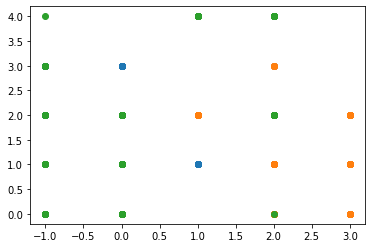

In [49]:
plt.scatter(p,q)
plt.scatter(q,r)
plt.scatter(p,r)
plt.show()

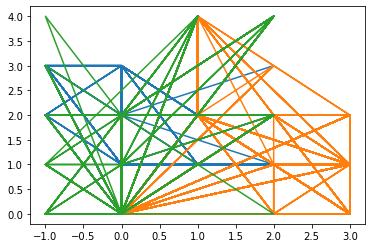

In [51]:
plt.plot(p,q)
plt.plot(q,r)
plt.plot(p,r)
plt.show()

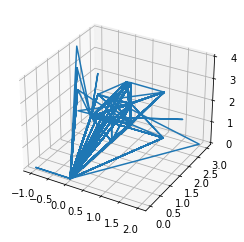

In [95]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

# Inference:

In clusters coloumn there is outlier/extreme values exists in the given data shows with-1.

# 2. Crime Data

perform Clustering(Hierarachical,Kmeans & DBSCAN)for the crime data amd identify the number of clusters formed and draw inferences

Data Description:Murder--Murder rates in different places of United of States Assualt-Assualt rate in different places of
United States UrbanPop - urban population in different places of united States Rape-Rape rste in different places of United 
States

In [53]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HP\Downloads\crime_data.csv")
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

EDA

In [54]:
# no. & labels of columns
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [55]:
# Renaming the column
df.columns = ["Name", "Murder", "Assult", "UrbanPop", "Rape"]

In [56]:
df.columns

Index(['Name', 'Murder', 'Assult', 'UrbanPop', 'Rape'], dtype='object')

In [57]:
# datatype and no.of values in datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assult    50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [58]:
# Rows and column in the dataset
df.shape

(50, 5)

In [59]:
df.describe()

Murder      Assult   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [60]:
# To find the total no.of null values in columns
df.isna().sum()

Name        0
Murder      0
Assult      0
UrbanPop    0
Rape        0
dtype: int64

In [61]:
df = df.iloc[:,1:]

In [62]:
from sklearn.preprocessing import LabelEncoder	
LE= LabelEncoder()	
df['Rape'] = LE.fit_transform(df['Rape'])	

In [63]:
#df['Murder'].unique()
#df['Assault'].unique()
#df['UrbanPop'].unique()
df['Rape'].unique()

array([26, 46, 40, 21, 45, 44,  6, 13, 41, 33, 23, 10, 31, 25,  8, 19, 15,
       28,  1, 37, 43, 11, 18, 38, 16, 17, 47,  4, 20, 42, 34, 14,  0, 27,
       22, 39,  2, 29,  9, 36, 32, 30,  7, 24, 35,  3,  5, 12],
      dtype=int64)

In [64]:
df[df.duplicated()]

Empty DataFrame
Columns: [Murder, Assult, UrbanPop, Rape]
Index: []

In [65]:
# To check correlation
df.corr()

Murder    Assult  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.625828
Assult    0.801873  1.000000  0.258872  0.688542
UrbanPop  0.069573  0.258872  1.000000  0.438389
Rape      0.625828  0.688542  0.438389  1.000000

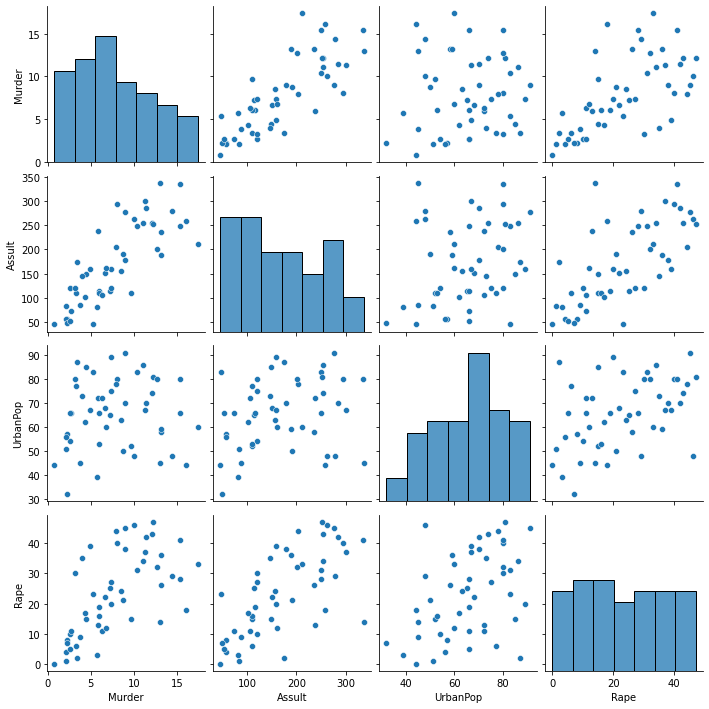

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

Hierarchical Clustering

In [80]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [81]:
# Normalization Function
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [82]:
# Normalization data frame ( Condsidering the numerical part of data)
df_norm = norm_func(df.iloc[:,0:])
df_norm.head()

Murder    Assult  UrbanPop      Rape  h_clusterid
0  0.746988  0.654110  0.440678  0.553191         0.25
1  0.554217  0.746575  0.271186  0.978723         0.25
2  0.439759  0.852740  0.813559  0.851064         0.75
3  0.481928  0.496575  0.305085  0.446809         0.00
4  0.493976  0.791096  1.000000  0.957447         0.75

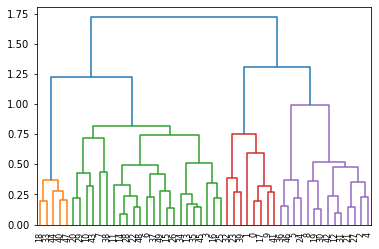

In [83]:
# Create Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [84]:
# Create Clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [85]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [86]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([2, 2, 1, 0, 1, 4, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 3, 1, 0, 1,
       0, 2, 4, 0, 0, 1, 0, 0, 1, 1, 2, 3, 0, 0, 4, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 4, 3, 0, 0], dtype=int64)

In [87]:
# creating cluster ID
df['h_clusterid'] = y_hc

In [89]:
df1 = df.sort_values("h_clusterid")
df1.iloc[:,[0,-1]].head()

Murder  h_clusterid
49     6.8            0
37     6.3            0
29     7.4            0
28     2.1            0
26     4.3            0

In [92]:
df['h_clusterid'].unique()

array([2, 1, 0, 4, 3], dtype=int64)

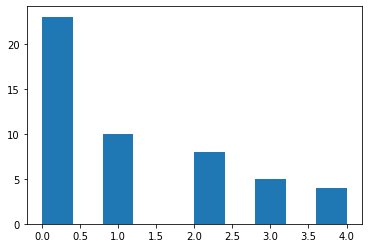

In [93]:
import matplotlib.pyplot as plt
plt.hist(df['h_clusterid'])
plt.show()

# K_Means Clustering

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [96]:
#standardized Dataset using scale
array = df.values

In [97]:
#standardized Dataset using scale
array = df.values

In [98]:
from sklearn.preprocessing import scale
scaled = scale(array)
scaled

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493,  0.65566762],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306,  0.65566762],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362, -0.10673659],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.86914079],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315, -0.10673659],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  2.18047603],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.86914079],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.86914079],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352, -0.10673659],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427,  0.65566762],
       [-0.57702994, -1.51224105,  1.21848371, -0.00582479, -0.86914079],
       [-1.20322802, -0.61527217, -0.80534376, -0.95235358, -0.86914079],
       [ 0.60578867,  0.94836277,  1.21848371,  0.57665446, -0.10673659],
       [-0.13637203, -0.70012057, -0.0

In [99]:
# Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 0.79078716, -0.52619514,  0.21260493,  0.65566762],
       [ 1.11805959, -1.22406668,  1.66880306,  0.65566762],
       [ 1.49381682,  1.00912225,  1.23194362, -0.10673659],
       [ 0.23321191, -1.08449238, -0.15144461, -0.86914079],
       [ 1.2756352 ,  1.77678094,  1.59599315, -0.10673659],
       [ 0.40290872,  0.86954794,  1.52318324,  2.18047603],
       [-0.73648418,  0.79976079, -1.2435932 , -0.86914079],
       [ 0.81502956,  0.45082502, -0.73392386, -0.86914079],
       [ 1.99078607,  1.00912225,  1.30475352, -0.10673659],
       [ 0.48775713, -0.38662083,  0.72227427,  0.65566762],
       [-1.51224105,  1.21848371, -0.00582479, -0.86914079],
       [-0.61527217, -0.80534376, -0.95235358, -0.86914079],
       [ 0.94836277,  1.21848371,  0.57665446, -0.10673659],
       [-0.70012057, -0.03768506,  0.13979502, -0.86914079],
       [-1.39102904, -0.5959823 , -1.09797339, -0.86914079],
       [-0.67587817,  0.03210209, -0.29706442, -0.86914079],
       [-0.74860538, -0.

In [100]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_df)
kmeans.inertia_

59.760941300915746

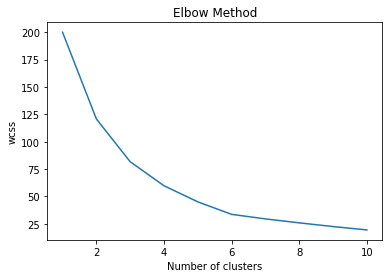

In [101]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [102]:
wcss

[200.00000000000003,
 120.78285513364895,
 81.71644981558921,
 59.760941300915746,
 45.04421211151515,
 33.63321532973927,
 29.474708570039986,
 25.86788941545006,
 22.471114719322465,
 19.417453861891826]

In [103]:
# Build Cluster Algorithm
cluster_new = KMeans(4, random_state = 42)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [104]:
cluster_new.labels_

array([2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 3, 0, 1, 0,
       1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 3, 1, 1, 2, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 2, 3, 1, 1])

In [107]:
# Assign Cluster to the dataset	
df['clusterid_new'] = cluster_new.labels_
cluster_new.cluster_centers_  # these are standardized value

array([[ 1.20412012,  0.95329253,  1.17369569, -0.10673659],
       [-0.60156994,  0.15347105, -0.55348192, -0.86914079],
       [ 0.66553475, -0.40988322,  0.66159935,  1.16393709],
       [-1.2383019 , -1.62883218, -1.38921302,  1.41807182]])

In [108]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new     Murder      Assult   UrbanPop       Rape h_clusterid
                      mean        mean       mean       mean        mean
0             0  11.370000  270.100000  79.200000  39.200000    1.000000
1             1   5.330435  121.130435  67.739130  15.478261    0.000000
2             2  11.541667  225.666667  59.666667  32.166667    2.666667
3             3   2.920000   68.600000  42.200000   4.000000    3.000000

In [109]:
df[df['clusterid_new'] == 3]
#df[df['clusterid_new'] == 0]

Murder  Assult  UrbanPop  Rape  h_clusterid  clusterid_new
18     2.1      83        51     1            3              3
33     0.8      45        44     0            3              3
40     3.8      86        45     9            3              3
44     2.2      48        32     7            3              3
47     5.7      81        39     3            3              3

DBSCAN : Density Base Spatial Clustering of Applications with Noise

In [110]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [111]:
array = df.values

In [112]:
st_scaler = StandardScaler()
X = st_scaler.fit_transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493,  0.65566762,
         0.8592097 ],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306,  0.65566762,
         0.8592097 ],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362, -0.10673659,
        -1.40186846],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.86914079,
        -0.27132938],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315, -0.10673659,
        -1.40186846],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  2.18047603,
         0.8592097 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.86914079,
        -0.27132938],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.86914079,
        -0.27132938],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352, -0.10673659,
        -1.40186846],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427,  0.65566762,
         0.8592097 ],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [113]:
dbscan = DBSCAN(eps = 5 , min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [114]:
DBSCAN(eps=5, min_samples=6)

DBSCAN(eps=5, min_samples=6)

In [115]:
# Noisy mples are given the label: -1
print(dbscan.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [116]:
cl = pd.DataFrame(dbscan.labels_, columns = ['clusters'])

In [117]:
cl

clusters
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
34         0
35         0
36         0
37         0
38         0
39         0
40         0
41         0
42         0
43         0
44         0
45         0
46         0
47         0
48         0
49         0

In [118]:
clustered = pd.concat([df,cl], axis =1)
clustered

Murder  Assult  UrbanPop  Rape  h_clusterid  clusterid_new  clusters
0     13.2     236        58    26            2              2         0
1     10.0     263        48    46            2              2         0
2      8.1     294        80    40            1              0         0
3      8.8     190        50    21            0              1         0
4      9.0     276        91    45            1              0         0
5      7.9     204        78    44            4              2         0
6      3.3     110        77     6            0              1         0
7      5.9     238        72    13            0              1         0
8     15.4     335        80    41            1              0         0
9     17.4     211        60    33            2              2         0
10     5.3      46        83    23            0              1         0
11     2.6     120        54    10            0              1         0
12    10.4     249        83    31            1              0         0
13     7.2     113        65    25            0              1         0
14     2.2      56        57     8            0              1         0
15     6.0     115        66    19            0              1         0
16     9.7     109        52    15            0              1         0
17    15.4     249        66    28            2              2         0
18     2.1      83        51     1            3              3         0
19    11.3     300        67    37            1              0         0
20     4.4     149        85    15            0              1         0
21    12.1     255        74    43            1              0         0
22     2.7      72        66    11            0              1         0
23    16.1     259        44    18            2              2         0
24     9.0     178        70    38            4              2         0
25     6.0     109        53    16            0              1         0
26     4.3     102        62    17            0              1         0
27    12.2     252        81    47            1              0         0
28     2.1      57        56     4            0              1         0
29     7.4     159        89    20            0              1         0
30    11.4     285        70    42            1              0         0
31    11.1     254        86    34            1              0         0
32    13.0     337        45    14            2              2         0
33     0.8      45        44     0            3              3         0
34     7.3     120        75    27            0              1         0
35     6.6     151        68    22            0              1         0
36     4.9     159        67    39            4              2         0
37     6.3     106        72    11            0              1         0
38     3.4     174        87     2            0              1         0
39    14.4     279        48    29            2              2         0
40     3.8      86        45     9            3              3         0
41    13.2     188        59    36            2              2         0
42    12.7     201        80    32            1              0         0
43     3.2     120        80    30            0              1         0
44     2.2      48        32     7            3              3         0
45     8.5     156        63    24            0              1         0
46     4.0     145        73    35            4              2         0
47     5.7      81        39     3            3              3         0
48     2.6      53        66     5            0              1         0
49     6.8     161        60    12            0              1         0

In [119]:
# -1 Shows outlier / extreme values for the dataset
clustered[clustered['clusters'] == -1].head()

Empty DataFrame
Columns: [Murder, Assult, UrbanPop, Rape, h_clusterid, clusterid_new, clusters]
Index: []

In [120]:
clustered.mean()

Murder             7.788
Assult           170.760
UrbanPop          65.540
Rape              23.080
h_clusterid        1.140
clusterid_new      1.240
clusters           0.000
dtype: float64

In [127]:
p = clustered.iloc[:,-1]
q = clustered.iloc[:,-2]
r = clustered.iloc[:,-3]
#print(p)
#print(q)
#print(r)

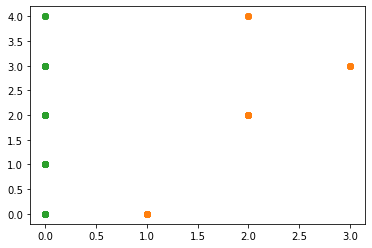

In [128]:
plt.scatter(p,q)
plt.scatter(q,r)
plt.scatter(p,r)
plt.show()

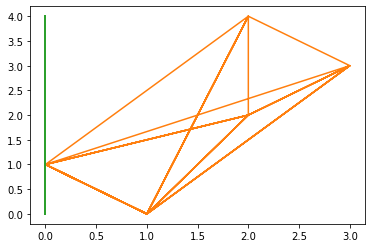

In [126]:
plt.plot(p,q)
plt.plot(q,r)
plt.plot(p,r)
plt.show()

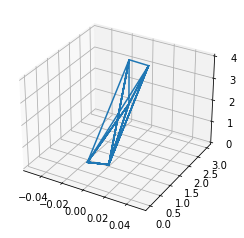

In [125]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

Inference:

In clusters column there is outiers/extreme values exists in the given data shows with -1.